# ABOUT DATASET

This dataset is publically availible on kaggle uploaded by **RUCHI BHATIA** under the [license](). The information about this dataset is available [here](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries).


**Let's begin.**


### Import libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
import seaborn as sns 
from matplotlib.ticker import PercentFormatter



### Import data

In [2]:
location = 'C:/Users/Ibad/Desktop/ds_salaries.csv'
salary = pd.read_csv(location)
salary.head(3)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


In [9]:
# removing unnecessary columns

col = ['Unnamed: 0', 'salary', 'salary_currency']
df = salary.drop(col, axis = 1,)

### ANALYZE

In [10]:
# General info about data

print(df.isna().sum())
print(df.info())
print(df.nunique())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB
None
work_year               3
experience_level        4
employment_type         4
job_t

**There are so many unique values in column *job_title*** 

lets see what kind of values are these. we will try to reduce these categorical as much as possible according to similarity in job.

In [11]:
df.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [12]:
data_science = ['Data Science', 'Data Scientist', 'AI Scientist','Research Scientist']
data_analyst = ['Data Analyst', 'Data Analytics','Analytics Engineer']
machine_learning = ['Machine Learning', 'ML']
data_engr = ['Data Engineer', 'Data Engineering','ETL Developer','Data Architect','Head of Data','NLP Engineer','Computer Vision','Data Specialist']

df['job_title'] = (
    np.select(
        condlist=[df.job_title.str.contains('|'.join(data_science)), df.job_title.str.contains('|'.join(data_analyst)),
                 df.job_title.str.contains('|'.join(machine_learning)), df.job_title.str.contains('|'.join(data_engr))], 
        choicelist=['Data Scientist', 'Data Analyst','Machine Learning ', 'Data Engineer' ], 
        default= df['job_title']))
df.job_title.value_counts()

Data Scientist       215
Data Engineer        189
Data Analyst         135
Machine Learning      68
Name: job_title, dtype: int64

In [13]:
# Convert Country code to Country Name.

    
def get_country(x):
    return pycountry.countries.get(alpha_2 = x).name
    
df['company_location'] = df['company_location'].apply(get_country)
df['employee_residence'] = df['employee_residence'].apply(get_country)

df.head(3)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,Germany,0,Germany,L
1,2020,SE,FT,Machine Learning,260000,Japan,0,Japan,S
2,2020,SE,FT,Data Engineer,109024,United Kingdom,50,United Kingdom,M


In [89]:
old_value = [0, 50, 100]
new_value = ['No_remote', 'partially_remote', 'fully_remote']
df['remote_ratio'] = df.remote_ratio.replace([0, 50, 100], ['No_remote', 'partially_remote', 'fully_remote'])

with the help of ***histogram*** visual lets check out which values are the most/less repeated.

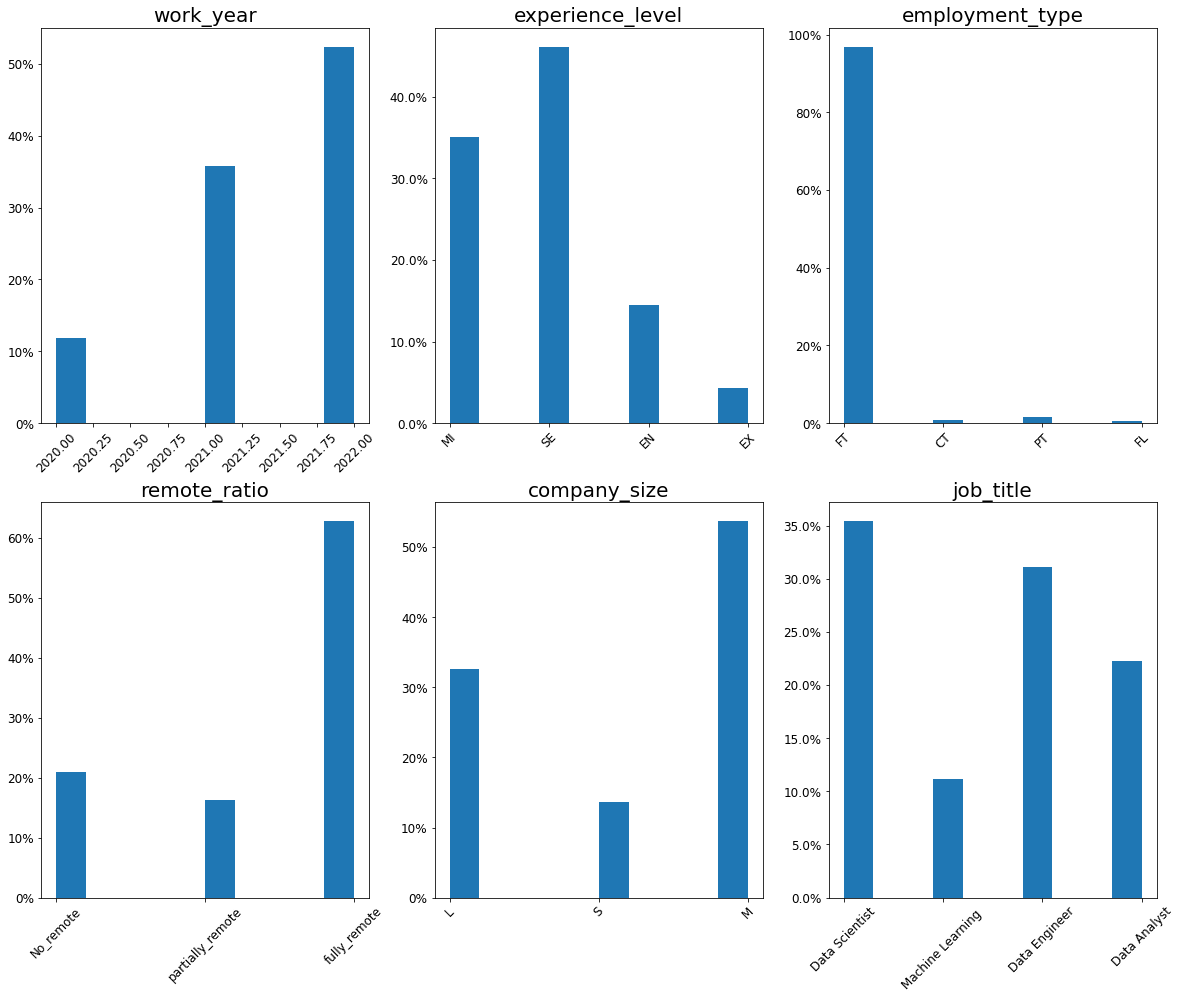

In [90]:
df_hist = ['work_year','experience_level','employment_type','remote_ratio','company_size', 'job_title']

plt.figure(figsize = (20,16))
for i in enumerate(df_hist):
    plt.subplot(2,3, i[0]+1)
    plt.hist(i[1], data = df, weights=np.ones(len(df)) / len(df))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.xticks(rotation = 45, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title(i[1], fontsize = 20)

* We will not include employment_type in our analysis due it's high biasness towards FT (Full Time). 
* work_year is showing the trend in increasing job oppertunaties with time.
* experience_level shows that people with a lot of experience **EX** or on Entry level **EN** are not much in company as compare to Junior Mid-level **MI** and Intermediate Senior-level **SE** 
* remote_ratio shows that people related to data are mostly people who prefer work from home. It's almost 62% more that no-remote work and partially remote work combine
* medium companies are more likely to pick a someone related to data.
* job_title shows which kind of job are most of the time in related to data.

## Time to find TRENDS and RELATIONSHIP

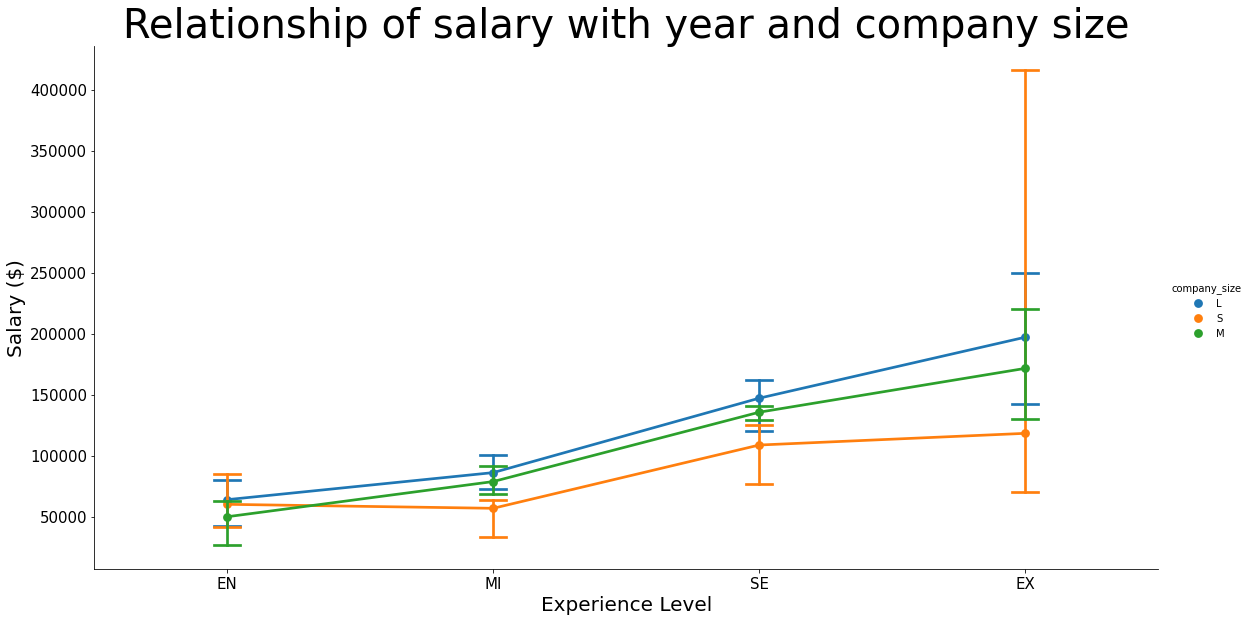

In [61]:


sns.catplot(x = 'experience_level',y = 'salary_in_usd', data = df, hue = 'company_size', estimator = np.median,
            order = ['EN', 'MI', 'SE', 'EX'], height = 8, aspect = 2, kind = 'point', capsize = 0.1)
plt.title("Relationship of salary with year and company size", fontsize = 40)
plt.xlabel('Experience Level', fontsize = 20)
plt.ylabel('Salary ($)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);


above fig shows that with experience your pay will increase. it's doesn't depend only on experince if we look at company size 
we can seee that bigger companies pay more that medium company, and meidum company pay more than small. we can say that **large company salary > medium company salary > small company salary**. It might not be the case with type of job and company size. it's intresting and quite unusal to see that small companies pay less to Junior mid level than entry level. While in other scenario **EN < MI < SE < EX** 

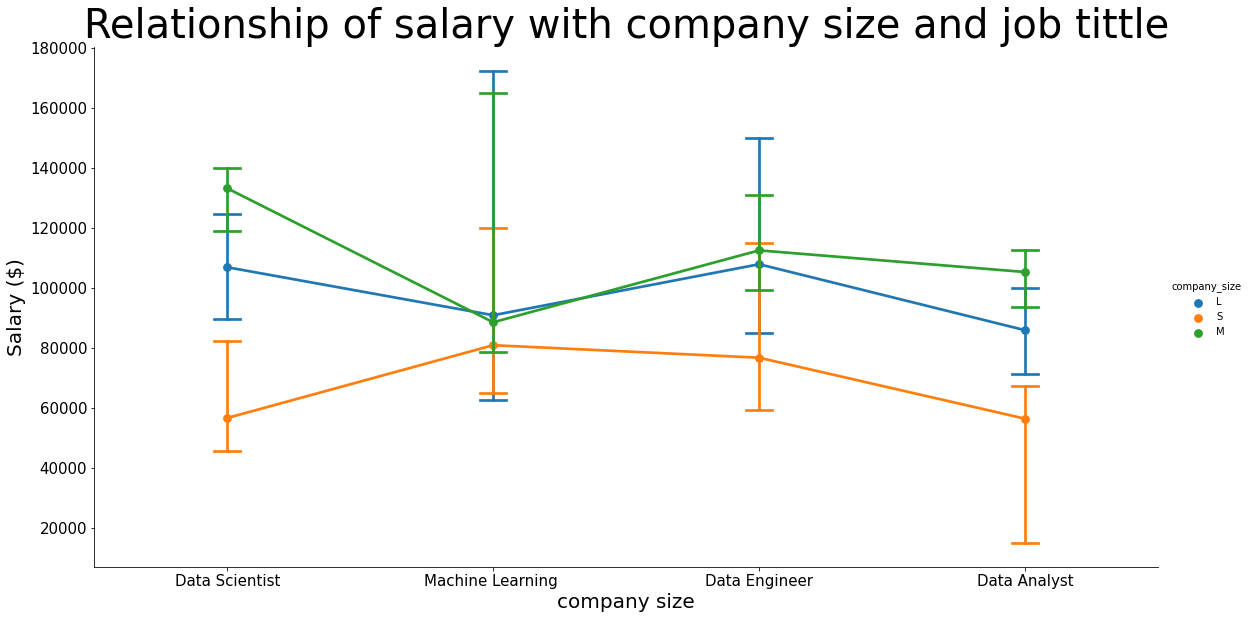

In [79]:
sns.catplot(x = 'job_title',y = 'salary_in_usd', data = df, hue = 'company_size', estimator = np.median,
            height = 8, aspect = 2, kind = 'point', capsize = 0.1)
plt.title("Relationship of salary with company size and job tittle", fontsize = 40)
plt.xlabel('Job Title', fontsize = 20)
plt.ylabel('Salary ($)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

above fig shows the type of job and company size with respect to salary.
AS a data analyst i need to look work in medium company, as they pay the most. 

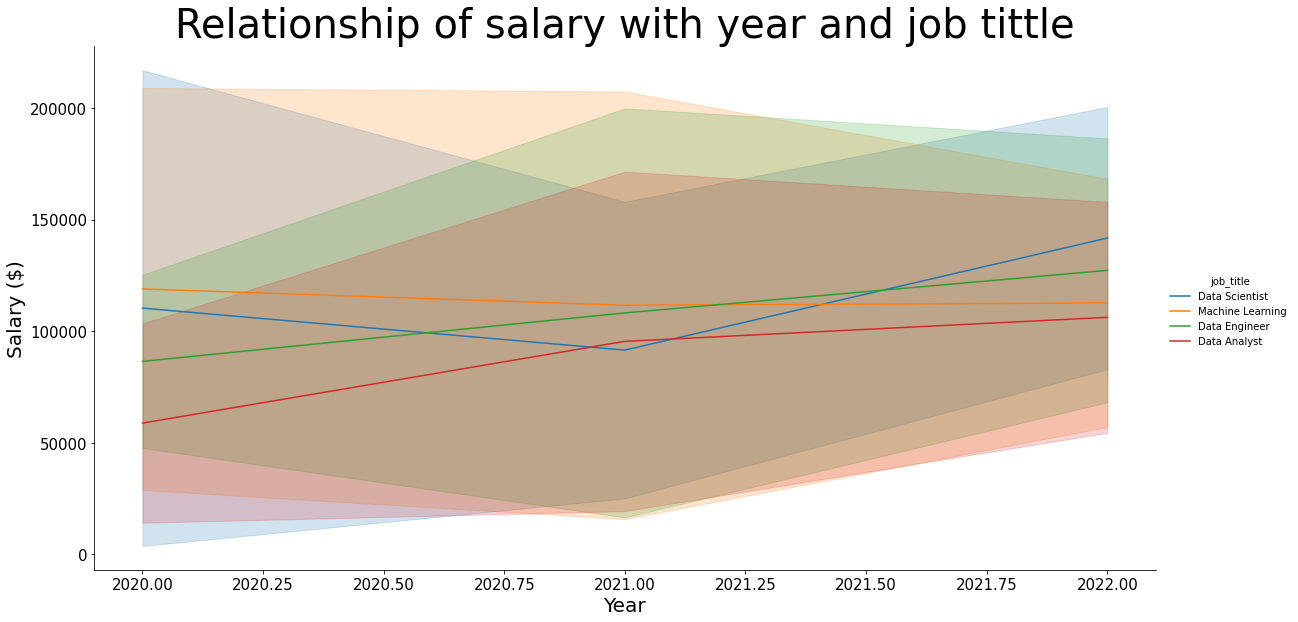

In [80]:

sns.relplot(x = 'work_year', y = 'salary_in_usd', data = df, kind = 'line', hue = 'job_title', ci = "sd",
           height = 8, aspect = 2)
plt.title("Relationship of salary with year and job tittle", fontsize = 40)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Salary ($)", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

above plot shows the trends of increasing/decreasing of salary with time.
* data analyst and data Engineer salaries are increasing with time.
* data scientist salary have been decreased from 2020 to 2021 and the sharply increased between 2021 to 2022.
* machine learning has constant over these years.

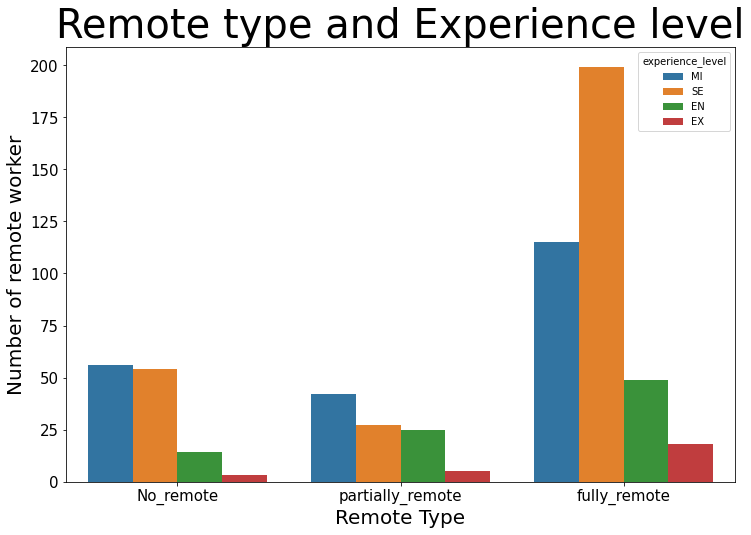

In [91]:
plt.figure(figsize = (12,8))
sns.countplot(x= 'remote_ratio', data =df, hue = 'experience_level')
plt.title("Remote type and Experience level", fontsize = 40)
plt.ylabel("Number of remote worker", fontsize = 20)
plt.xlabel("Remote Type", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

AS expected that graphs of **SE** in experience and **fully_remote** in remote-ratio will be highest. AS we have seen these two were the highest in histogram graphs.

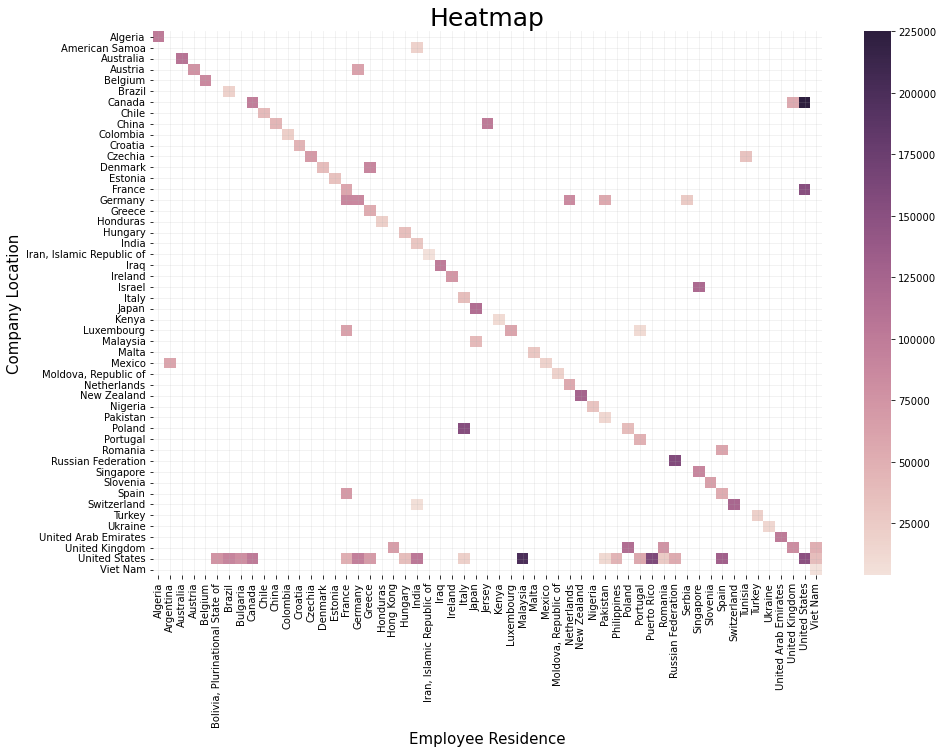

In [321]:
plt.figure(figsize = (15,10))


df_heatmap = df.pivot_table(values='salary_in_usd',index='company_location',columns='employee_residence',aggfunc=np.mean)
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
cmap.set_under(".5")
sns.heatmap(df_heatmap, cmap = cmap)
plt.title("Heatmap", fontsize = 25)
plt.xlabel("Employee Residence", fontsize = 15)
plt.ylabel("Company Location", fontsize = 15)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, alpha = 0.2)
plt.show()


* heatmap shows that **United States** offer most of the jobs.
* heatmap is almost completly fill on diagnol, it shows that company location and employee residence are from same country.
* filled places on non-diagnol shows that employee residence and company locations are different.